In [8]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer ,Dense, Flatten, Dropout, Rescaling
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, regularizers
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2
import pickle

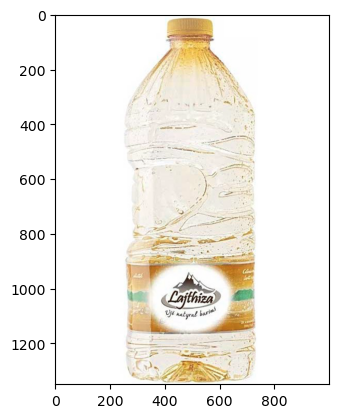

In [9]:
# NOTE: IF THE DATASET HASNT CHANGED AND YOU WANT TO KEEP THE SAME DATA PREPERATION TECHNIQUES AS THE ONES USED BELOW YOU CAN JUMP TO
# THE SECTION ON IMPORTING THE PICKLE FILE FORMAT.

DATADIR = "C:\\Users\\USER\\DataScience\\waterDataset"
CATEGORIES = ["lajthiza", "qafshtama","tepelena"]

# showing the first image in our dataset
for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            plt.imshow(img_array)
            plt.show()
            break
        break

In [10]:
# showing the arrays dimesnions of our image
print(img_array.shape)

(1350, 1000, 3)


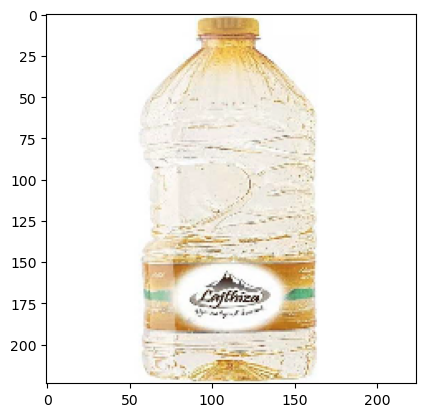

In [11]:
# image size
IMG_SIZE = 224;

# resizing the image till be we see the perfect fit
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
plt.imshow(new_array) 
plt.show() 

In [12]:

training_data = []

# creating a function to store inside of the training_data list the resized image and its corresponding labels
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        category_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, category_num])
            except Exception as e:
                pass

create_training_data()


In [13]:
# testing training_data length, to see if we have any loss of our data
print(len(training_data))

324


In [14]:
import  random

#shuffling data to reduce bias and avoid overfitting 
random.shuffle(training_data)

In [15]:
#features list, image data in a NUMpy array
img_data =[]
#brand list, catgories of botttels as indexes of the  category_num variable
labels_data = []


for features, brands in training_data:
    img_data.append(features)
    labels_data.append(brands)

img_data = np.array(img_data).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
labels_data = np.array(labels_data)


In [16]:
# Save the dataset in a binary file to reload it easily without reprocessing each time.
pickle_out = open("img_data_D.pickle", "wb")
pickle.dump(img_data, pickle_out)
pickle_out.close()

pickle_out = open("labels_data_D.pickle", "wb")
pickle.dump(labels_data, pickle_out)
pickle_out.close()

In [17]:
X = np.array(pickle.load(open("img_data_D.pickle", "rb")))
y = np.array(pickle.load(open("labels_data_D.pickle", "rb")))

# Get IMG_SIZE 
IMG_SIZE = X.shape[1]

# Verifying the shape of the loaded data
print(f"Loaded images shape: {X.shape}")
print(f"Loaded labels shape: {y.shape}")

num_classes = len(np.unique(y))
print(num_classes)

#Converting labels array into binary data,for the best performance by the maschine learining model
y = tf.keras.utils.to_categorical(y, num_classes=num_classes)

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=42)

# Verifying data shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

Loaded images shape: (324, 224, 224, 3)
Loaded labels shape: (324,)
3
X_train shape: (194, 224, 224, 3)
y_train shape: (194, 3)
X_val shape: (130, 224, 224, 3)
y_val shape: (130, 3)


In [18]:
# Define the model
model = Sequential([
    # Specifying the input layer of the data
    InputLayer(shape=(IMG_SIZE, IMG_SIZE, 3)),
    
    # Converting data into 1D array
    Flatten(),

    # Performing feature extraction with two dense layer using 256 neurons each
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),

    # Generating category probabilities using a final dense layer with softmaxactivation function
    Dense(num_classes, activation='softmax', name="result")
])

# Compile the model
model.compile(optimizer='adam',
              #function loss
              loss='categorical_crossentropy',
              metrics=['accuracy'])


batch_size = 32
epochs = 50

# Train the model
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))

# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation accuracy: {val_accuracy * 100:.2f}%')

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 295ms/step - accuracy: 0.2908 - loss: 16394.7676 - val_accuracy: 0.3231 - val_loss: 18887.1914
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 266ms/step - accuracy: 0.3003 - loss: 15843.2305 - val_accuracy: 0.3385 - val_loss: 7923.0420
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 265ms/step - accuracy: 0.3290 - loss: 4965.7495 - val_accuracy: 0.3385 - val_loss: 4705.3433
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 271ms/step - accuracy: 0.4172 - loss: 5002.2080 - val_accuracy: 0.3385 - val_loss: 10282.9990
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 266ms/step - accuracy: 0.3873 - loss: 7176.9790 - val_accuracy: 0.3769 - val_loss: 2193.3359
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 264ms/step - accuracy: 0.4024 - loss: 3315.2739 - val_accuracy: 0.3308 - val_loss: 1688.6365
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 265ms/step - accuracy: 0.4598 - loss: 2168.1680 - val_accuracy: 0.3231 - val_loss: 3579.2852
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 260ms/step - accuracy: 0.3555 - l

In [19]:
model.save('water_bottle_Dense_model.keras')

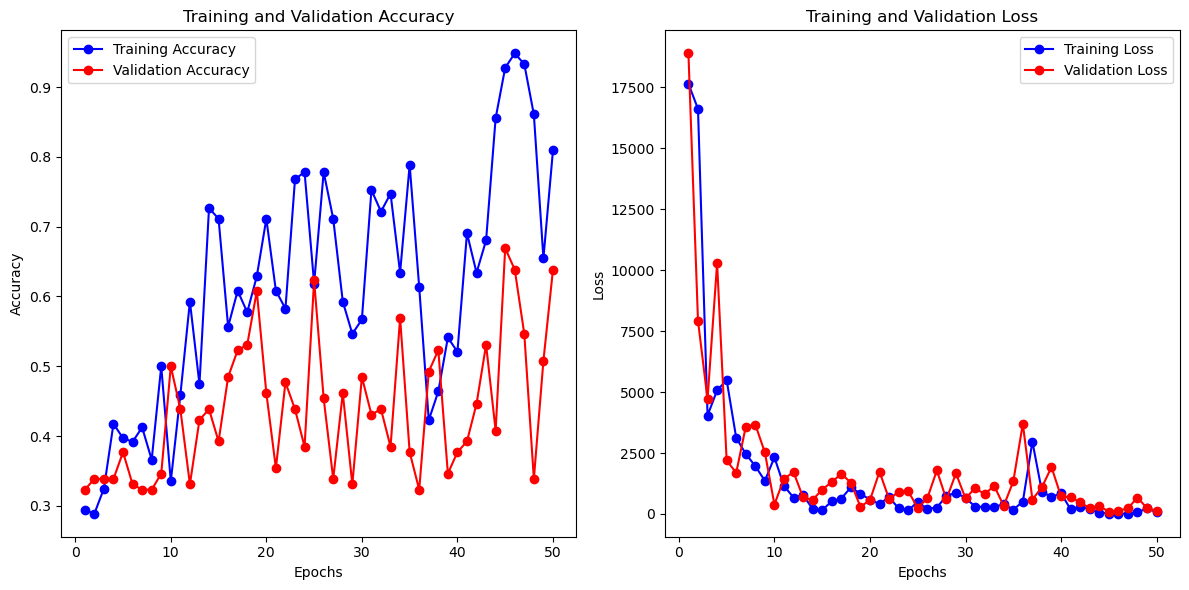

In [20]:
epochs = range(1, 51)

plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], 'bo-', label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], 'bo-', label='Training Loss')
plt.plot(epochs, history.history['val_loss'], 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()